<a href="https://colab.research.google.com/github/hugocfrias/MVP-Machine-Learning/blob/main/MVP_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP: Machine Learning**

**Título:** Modelo Supervisionado- Base de dados 'Mental Health Lifestyle'

**Nome:** Hugo Coelho de Frias

**Matrícula:** 4052025000248

**Linkedin:** https://www.linkedin.com/in/hugo-frias-7059b622/

**E-mail:** hugofrias2@hotmail.com

Dataset: [Mental_Health_Lifestyle](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024)


Link DataBase GitHub Raw : https://github.com/hugocfrias/MVP-Machine-Learning/blob/main/Mental_Health_Lifestyle_Dataset_CSV.csv


# 1. Escopo, objetivo e definição do problema

O Conjunto de Dados de '**Mental Health and Lifestyle Habits Dataset (2019-2024)**' é uma coleção abrangente de dados que visa compreender como diversos fatores de estilo de vida afetam o bem-estar mental. Esta base de dados captura aspectos como rotinas de exercícios, hábitos alimentares, padrões de sono, níveis de estresse e interações sociais, além de informações demográficas.

O objetivo é identificar 'níveis de stress e bem-estar' de acordo com hábitos do cotidiano.


## 1.1. Hipóteses do Problema

Hipóteses levantadas:

1. Podemos segregar os diferentes níveis de stress e bem-estar de acordo com as aferições de horas de sono, horas de trabalho e horas em telas diários, por exemplo?

2. Existe alguma correlação entre os atributos numéricos (exemplo: horas de sonos e horas trabalhadas)?

3. Há algum padrão facilmente de ser identificado apenas com uma análise gráfica?

4. Premissas: De maneira empírica, pela natureza dos atributos do dataset original, creio que há uma correlação entre alguns desses atributos (exemplos: horas de sono vs horas trabalhadas / horas de sono vs horas de tela).


## 1.2. Tipo de Problema

O problema foi identificado como do tipo de **classificação supervisionada**. De acordo com os atributos numéricos (horas de sono, horas trabalhadas, idade, score de felididade etc), o objetivo é a previsão dos '**níveis de stress**' e  bem-estar' dos indivíduos.

# 2. Reprodutibilidade e ambiente

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.


*Observações Iniciais Importações e Carga de Dados*


---


<<EDITAR!!!>> Além da importação das bibliotecas pandas, numpy, matplotlib e seaborn, realizei  importação das paletas de cores 'viridis' e 'inferno'. O objetivo é uma melhor visualização dos gráficos que virão a seguir.


---


## 2.1. Bibliotecas Utilizadas

In [35]:
# Tratamento de warnings
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Imports de Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 2. Dados: carga, entendimento e qualidade

Demonstração o carregamento do dataset **'Mental Health Lifestyle'**.



## 2.1. Seleção de Dados

O dataset '**Mental Health Lifestyle**' foi coletado de acordo com as orientações do guia do MVP.

Fonte: https://www.kaggle.com/datasets.

## 2.2. Atributos do Dataset

O dataset '**Mental Health Lifestyle**' possui 3000 instâncias, de maneira balanceada em relação aos atributos categóricos (Países, Gêneros, Tipo de Dieta etc). No total, possui 12 atributos:

---
1. Country:	País do respondente (Australia, Brazil, Canada, Germany, India, Japan, USA)
2. Age: Idade do respondente (Anos)
3. Gender:	Identidade de gênero do respondente (Female, Male, Other)
4. Exercise Level: Nível de exercício físico do respondente (High, Low, Moderate)
5. Diet Type:	Classificação da dieta do respondente (Balanced, Junk Food, Keto, Vegan, Vegetarian)
6. Sleep Hours:	Horas de sono diária do respondente (Horas)
7. Stress Level: Nível de stress do respondente (High, Low, Moderate)
8. Mental Health Condition: Condição de saúde mental do respondente (Anxiety, Bipolar, Depression, None, PTSD)
9. Work Hours per Week: Horas de trabalho diária do respondente (Horas)
10. Screen Time per Day: Tempo de tela diária do respondente (Horas)
11. Social Interaction Score: Pontuação de interação Social do respondente (Escala 1-10)
12. Happiness Score: Pontuação de Felicidade do respondente (Escala 1-10)
---



## 2.3. Carga do Dataset

In [37]:
# importação dos dados uma url para um dataframe

url_dados = 'https://raw.githubusercontent.com/hugocfrias/hugocfrias-MVP/refs/heads/main/Mental_Health_Lifestyle_Dataset.csv'

# Carga do dataset através da url
Mental_Health_Lifestyle = pd.read_csv(url_dados)

In [38]:
# Exibição as primeiras linhas
Mental_Health_Lifestyle.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


>**Com o objetivo de facilitar as próximas análises, realizei uma reordenação dos atributos. Nesse caso, iniciando o dataframe (df) com os atributos categóricos e, posteriormente, os atributos núméricos**


In [39]:
# Reordenação das colunas com o objetivo de iniciar o df com os atributos categóricos
new_order = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Mental Health Condition', 'Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score', 'Stress Level' ]
df = Mental_Health_Lifestyle[new_order]

In [40]:
# === Verificações iniciais ===
display(df.sample(5))
print("\nFormato:", df.shape)
print("\nTipos:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())

,Country,Gender,Exercise Level,Diet Type,Mental Health Condition,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Stress Level
1306,Brazil,Other,High,Vegan,NaN,39,9.1,31,6.4,9.6,1.2,Low
2037,Brazil,Female,Moderate,Balanced,Depression,34,5.5,55,4.4,9.1,1.9,High
568,USA,Other,High,Vegan,PTSD,63,9.1,58,6.9,8.9,9.6,Moderate
1897,India,Female,Low,Balanced,PTSD,33,3.5,30,6.9,5.6,4.9,Low
2498,Japan,Female,Moderate,Junk Food,PTSD,42,6.3,50,5.0,8.6,6.3,Low



Formato: (3000, 12)

Tipos:
Country                         object
Gender                          object
Exercise Level                  object
Diet Type                       object
Mental Health Condition         object
Age                              int64
Sleep Hours                    float64
Work Hours per Week              int64
Screen Time per Day (Hours)    float64
Social Interaction Score       float64
Happiness Score                float64
Stress Level                    object
dtype: object

Valores ausentes por coluna:
Country                          0
Gender                           0
Exercise Level                   0
Diet Type                        0
Mental Health Condition        595
Age                              0
Sleep Hours                      0
Work Hours per Week              0
Screen Time per Day (Hours)      0
Social Interaction Score         0
Happiness Score                  0
Stress Level                     0
dtype: int64


## 2.3. Análise exploratória resumida (EDA)

**Importante:** A análise exploratória mais detalhada do dataset foi realizada no MVP de **'Análise de Dados e Boas Práticas'**.

Link MVP **'Análise de Dados e Boas Práticas'**: https://github.com/hugocfrias/hugocfrias-MVP/blob/main/Untitled5.ipynb


### 2.3.1 Balanceamento de classes

>**Análise de balanceamento do atributo categórico 'Gênero'**



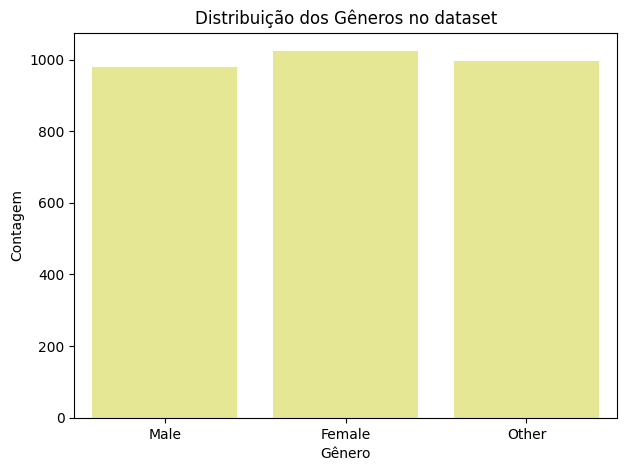

In [41]:
#Exemplo 1 de balenceamento das variáveis categóricas (Gênero).
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Gender', data=df, color='#f3f586')
plt.title('Distribuição dos Gêneros no dataset')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

>**Análise de balanceamento do atributo categórico 'Países'**

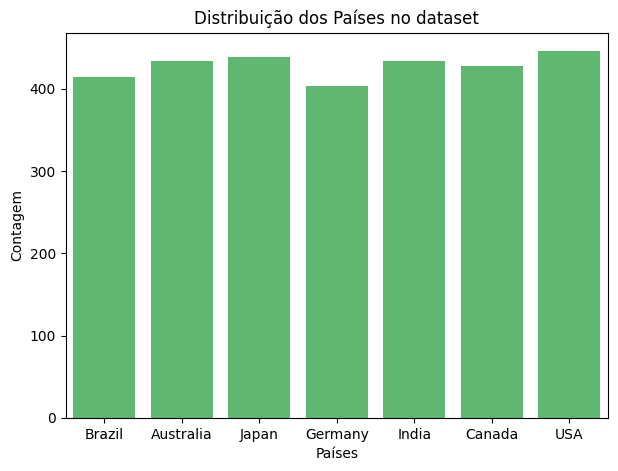

In [42]:
#Exemplo 2 de balenceamento das variáveis categóricas (Países).
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Country', data=df, color='#52c569')
plt.title('Distribuição dos Países no dataset')
plt.xlabel('Países')
plt.ylabel('Contagem')
plt.show()

*Comentários Total e Tipo de Instâncias:*


---


>Os gráficos de barras acima mostram que o dataset é balanceado em relação às classes 'Gênero' e 'Países'. Estes atributos foram utilizados como exemplos, porém os demais têm o mesmo comportamento. Esse balanceamento é essencial para que um modelo construído a partir desses dados não desfavoreça algum tipo dessas classes.


---

### 2.3.2 Estatísticas Descritivas

*Observações Iniciais Estatísticas Descritivas*


---


Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.


---

In [43]:
# Estatísticas descritivas básicas do dataset
df.describe()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,41.229667,6.475933,39.466333,5.089833,5.470200,5.395067
std,13.428416,1.499866,11.451459,1.747231,2.563532,2.557601
min,18.000000,1.400000,20.000000,2.000000,1.000000,1.000000
25%,30.000000,5.500000,30.000000,3.600000,3.300000,3.200000
50%,41.000000,6.500000,39.000000,5.100000,5.500000,5.400000
75%,53.000000,7.500000,50.000000,6.600000,7.600000,7.500000
max,64.000000,11.300000,59.000000,8.000000,10.000000,10.000000


### 2.3.3 Histogramas

*Observações Iniciais Histograma*


---


A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.


---


**Histograma dos atributos numéricos**


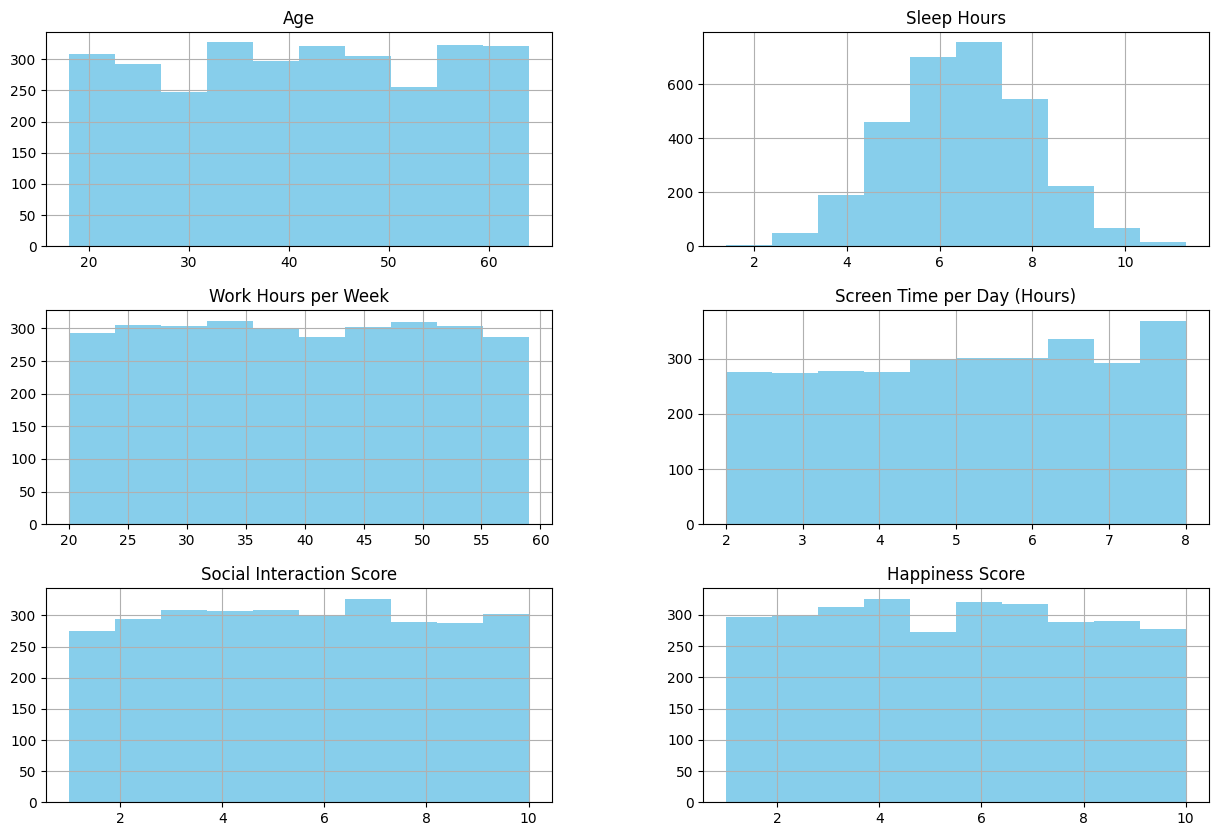

In [44]:
# Histogramas Variáveis Categóricas
df.hist(figsize = (15,10),color='skyblue',grid=1)
plt.show()

Podemos analisar que o atributo 'Horas de Sono' é o único com uma distribuição normal. Sendo os demais, distribuições uniformes.


**Densidade dos atributos numéricos**

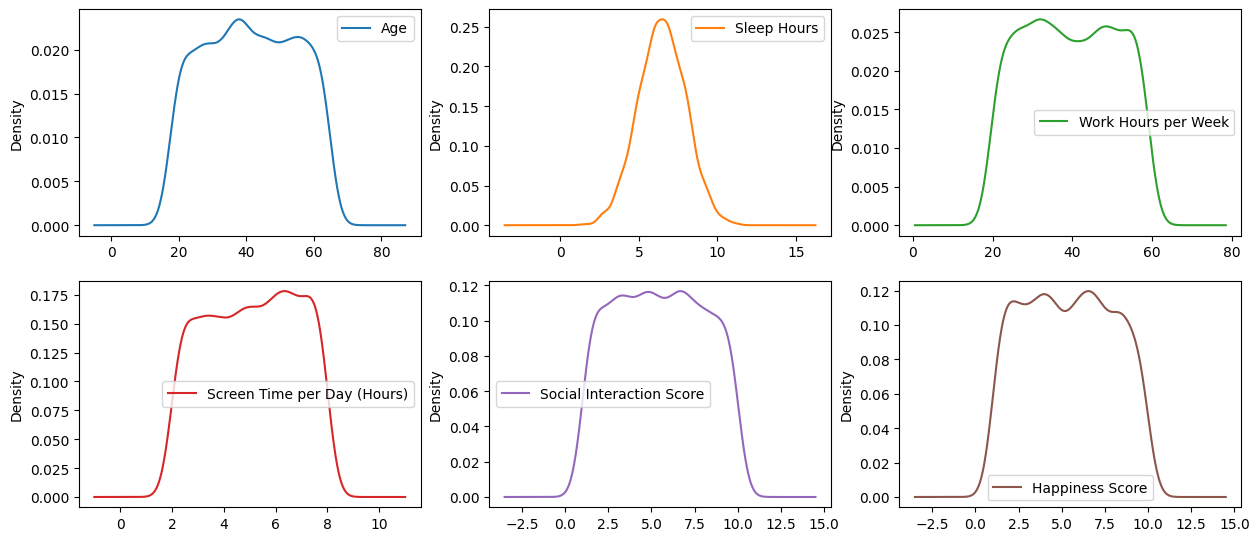

In [45]:
# Densidade Variáveis Numéricas
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

As densidade confiram as análises dos histogramas. O 'formato de sino' do atributo 'Horas de Sono' demonstra sua distribuição normal.

### 2.3.4 Boxplot

*Observações Iniciais Boxplot*


---


Para entender as diferenças entre os atributos categóricos, devemos olhar como se comportam os valores quando agrupados. Isso nos permite comparar a média, mediana e desvio padrão.


---


**Boxplots dos atributos numéricos**

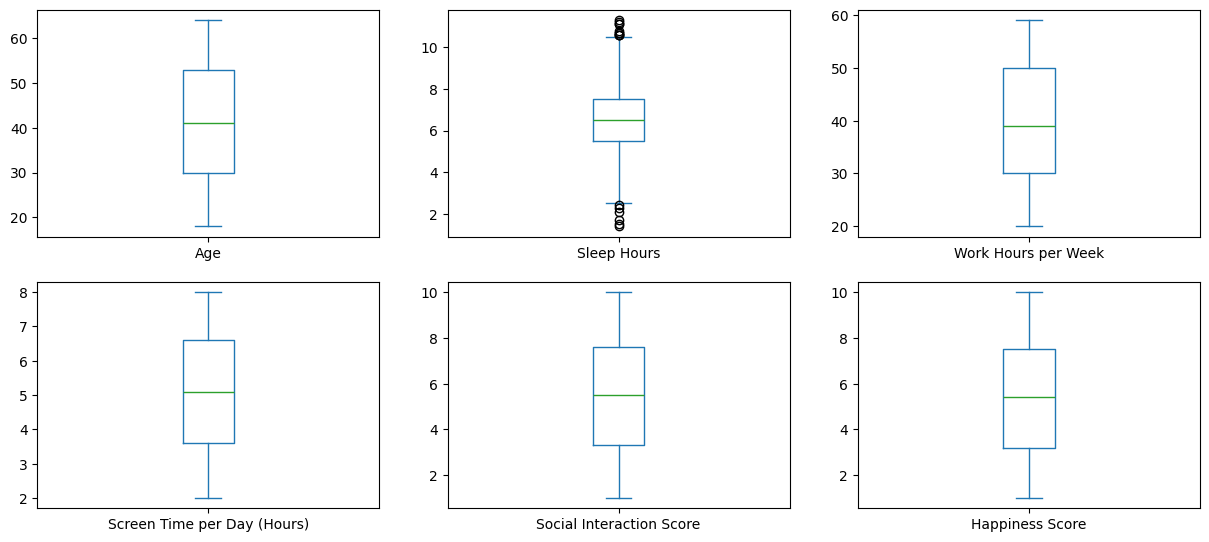

In [46]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Com uma análise inicial dos boxplots, se destacam os *outliers* do atributo 'Horas de Sono'

# 3. Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

### *3.1. Tratamento de Nulos*

A limpeza consiste na verificação da consistência das informações, correção de possíveis erros de preenchimento ou eliminação de valores desconhecidos, redundantes ou não pertencentes ao domínio.

>**No dataframe 'df', podemos ver abaixo que há 595 instâncias com valores nulos no atributo 'Mental Health Condition'. Analisando o dataset original, as 595 linhas nulas estão com o status de 'None'. Por ser tratar de um estado de desordem mental (Mental Health Condition), tive a dúvida se realmente são informações faltantes ou simplesmente instâncias nas quais o respondente não
possuía algum tipo de desordem mental.**

>**Com a impossibilidade de pesquisar essa dúvida, optei por exluir do dataframe o atributo 'Mental Health Condition'.**

>**Dessa forma, foi criado o dataframe 'df_cleaned'.**

In [47]:
# Verificar a presença de valores nulos no dataset df
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
Country,0
Gender,0
Exercise Level,0
Diet Type,0
Mental Health Condition,595
Age,0
Sleep Hours,0
Work Hours per Week,0
Screen Time per Day (Hours),0
Social Interaction Score,0


In [48]:
# Criação do novo DataFrame com a limpeza dos dados (exclusão coluna 'Mental Health Condition')
df_cleaned = df.dropna(axis=1, how='any')

As demonstrações do datraframe após a limpeza podem ser vistas nos código que exibem as primeiras do dataframe 'df_cleaned';

In [49]:
# Exibição das primeiras linhas df_cleaned
df_cleaned.head()

,Country,Gender,Exercise Level,Diet Type,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Stress Level
0,Brazil,Male,Low,Vegetarian,48,6.3,21,4.0,7.8,6.5,Low
1,Australia,Male,Moderate,Vegan,31,4.9,48,5.2,8.2,6.8,Low
2,Japan,Female,Low,Vegetarian,37,7.2,43,4.7,9.6,9.7,High
3,Brazil,Male,Low,Vegan,35,7.2,43,2.2,8.2,6.6,Low
4,Germany,Male,Low,Balanced,46,7.3,35,3.6,4.7,4.4,Low


Abaixo verificamos que não há mais a presença de nulos no dataframde 'df_cleaned'

In [50]:
# Verificação da presença de valores nulos no dataset df_cleaned
print("Valores nulos no dataset Iris:")
df_cleaned.isnull().sum()

Valores nulos no dataset Iris:


,0
Country,0
Gender,0
Exercise Level,0
Diet Type,0
Age,0
Sleep Hours,0
Work Hours per Week,0
Screen Time per Day (Hours),0
Social Interaction Score,0
Happiness Score,0


*Comentários Tratamento de Nulos:*:


---


> Como citado anteriormente, optei pela remoção do atributo categórico 'Mental Health Condition' pela presença de linhas 'None';

> Após a limpeza foi criado o dataframe 'df_cleaned';

---


### *3.2. One Hot Enconding*

O '*One Hot Encoding*' tem o objetivo de transformar os atributos categóricos.


Abaixo verificamos a aplicação básica do código de '*One Hot Encoding*':

In [51]:
# Exibição dos dados transformados
df_OneHotEnconder_test = OneHotEncoder(sparse_output=False).fit_transform(df_cleaned[['Country','Gender','Exercise Level','Diet Type']])

print("Atributos transformados:")
print(df_OneHotEnconder_test[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]]


>**Para tornar possível a criação de um novo dataframe que contenha os atributos numéricos normalizados e também os atributos categóricos transformados (via '*One Hot Encoding*'), foi necessário seguir os processos do códigos a seguir:**

>>**1. Criação do dodataframde 'df_encoded' com a transformação dos atributos categórigos via '*One Hot Encoding*';**

>>**2. Criaçao do dataframde 'df_final', que é o resultado da junção dos dataframes 'df_norm' e 'df_encoded';**

>>**3. Exclusão dos atributos (df_final.drop) não transformados via '*One Hot Encoding*' com o objetivo de termos no dataframde 'df_final' termos apenas os atributos numéricos normalizados e os atributos categóricos transformados.**

In [52]:
# Tratamento para a criação de um nodo Dataframe (df_final) com os atributos transformados
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_cleaned[['Country','Gender','Exercise Level','Diet Type']])

# Criação do df_encoded: criação do Dataframe com os atributos categóricos transformados
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Country','Gender','Exercise Level','Diet Type']))

# Criação do df_final: concatenação de df_cleaned e df_encoded
df_final = pd.concat([df_cleaned, df_encoded], axis=1)

# remoção das colunas não transformadas
df_final.drop(['Country','Gender','Exercise Level','Diet Type'], axis=1, inplace= True)

print(df_final)

      Age  Sleep Hours  Work Hours per Week  Screen Time per Day (Hours)  \
0      48          6.3                   21                          4.0   
1      31          4.9                   48                          5.2   
2      37          7.2                   43                          4.7   
3      35          7.2                   43                          2.2   
4      46          7.3                   35                          3.6   
...   ...          ...                  ...                          ...   
2995   57          7.0                   29                          4.4   
2996   27          7.1                   47                          7.4   
2997   42          6.0                   23                          3.9   
2998   25          5.7                   51                          4.3   
2999   28          6.9                   41                          6.7   

      Social Interaction Score  Happiness Score Stress Level  \
0                      

In [53]:
# Exibição das primeiras linhas df_final
df_final.head()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Stress Level,Country_Australia,Country_Brazil,Country_Canada,...,Gender_Male,Gender_Other,Exercise Level_High,Exercise Level_Low,Exercise Level_Moderate,Diet Type_Balanced,Diet Type_Junk Food,Diet Type_Keto,Diet Type_Vegan,Diet Type_Vegetarian
0,48,6.3,21,4.0,7.8,6.5,Low,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,31,4.9,48,5.2,8.2,6.8,Low,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,7.2,43,4.7,9.6,9.7,High,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,35,7.2,43,2.2,8.2,6.6,Low,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,46,7.3,35,3.6,4.7,4.4,Low,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [54]:
# Coluna a ser movida para o fim
col_a_mover = 'Stress Level'

colunas_atuais = df_final.columns.tolist()
colunas_atuais.remove(col_a_mover)

# Adiciona a coluna a ser movida ao final
nova_ordem_colunas = colunas_atuais + [col_a_mover]

# Reordena o DataFrame
df_reordenado = df_final[nova_ordem_colunas]

print("\nDataFrame com 'col_mover' no fim:")
print(df_reordenado)


DataFrame com 'col_mover' no fim:
      Age  Sleep Hours  Work Hours per Week  Screen Time per Day (Hours)  \
0      48          6.3                   21                          4.0   
1      31          4.9                   48                          5.2   
2      37          7.2                   43                          4.7   
3      35          7.2                   43                          2.2   
4      46          7.3                   35                          3.6   
...   ...          ...                  ...                          ...   
2995   57          7.0                   29                          4.4   
2996   27          7.1                   47                          7.4   
2997   42          6.0                   23                          3.9   
2998   25          5.7                   51                          4.3   
2999   28          6.9                   41                          6.7   

      Social Interaction Score  Happiness Score  Cou

In [55]:
# Exibição das primeiras linhas df_final
df_reordenado.head()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Country_Australia,Country_Brazil,Country_Canada,Country_Germany,...,Gender_Other,Exercise Level_High,Exercise Level_Low,Exercise Level_Moderate,Diet Type_Balanced,Diet Type_Junk Food,Diet Type_Keto,Diet Type_Vegan,Diet Type_Vegetarian,Stress Level
0,48,6.3,21,4.0,7.8,6.5,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Low
1,31,4.9,48,5.2,8.2,6.8,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Low
2,37,7.2,43,4.7,9.6,9.7,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,High
3,35,7.2,43,2.2,8.2,6.6,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Low
4,46,7.3,35,3.6,4.7,4.4,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Low


# 4. Separação Treino e Teste
**Separação em conjunto de treino e conjunto de teste com holdout**

In [56]:
# Preparação dos dados

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em bases de treino e teste (holdout)
array = df_reordenado.values
X = array[:,0:24] # atributos
y = array[:,24] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed) # faz a divisão

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [57]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (2400, 24)
Dimensões de X_test: (600, 24)
Dimensões de y_train: (2400,)
Dimensões de y_test: (600,)


# 5. Modelagem Simples

KNN: 0.342917 (0.026877)
CART: 0.327917 (0.022826)
NB: 0.338333 (0.020138)
SVM: 0.340417 (0.024583)


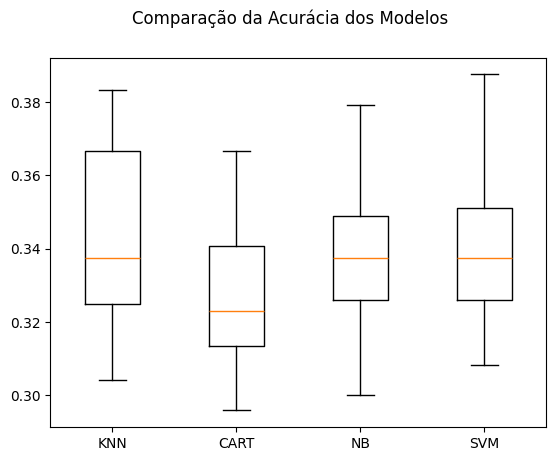

In [58]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Convert y_train to categorical type
#y_train = y_train.astype('category')

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [59]:
# Criando um modelo com todo o conjunto de treino
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.33666666666666667


# 5. Modelagem e Inferência (Recursos Avançados)

### *5.1. Criação e avaliação de modelos: linha base*

LR: 0.338750 (0.029991)
KNN: 0.342917 (0.026877)
CART: 0.327917 (0.022826)
NB: 0.338333 (0.020138)
SVM: 0.340417 (0.024583)
Bagging: 0.339583 (0.026696)
RF: 0.332500 (0.018238)
ET: 0.332083 (0.026813)
Ada: 0.324167 (0.025874)
GB: 0.341250 (0.023233)
Voting: 0.338333 (0.037814)


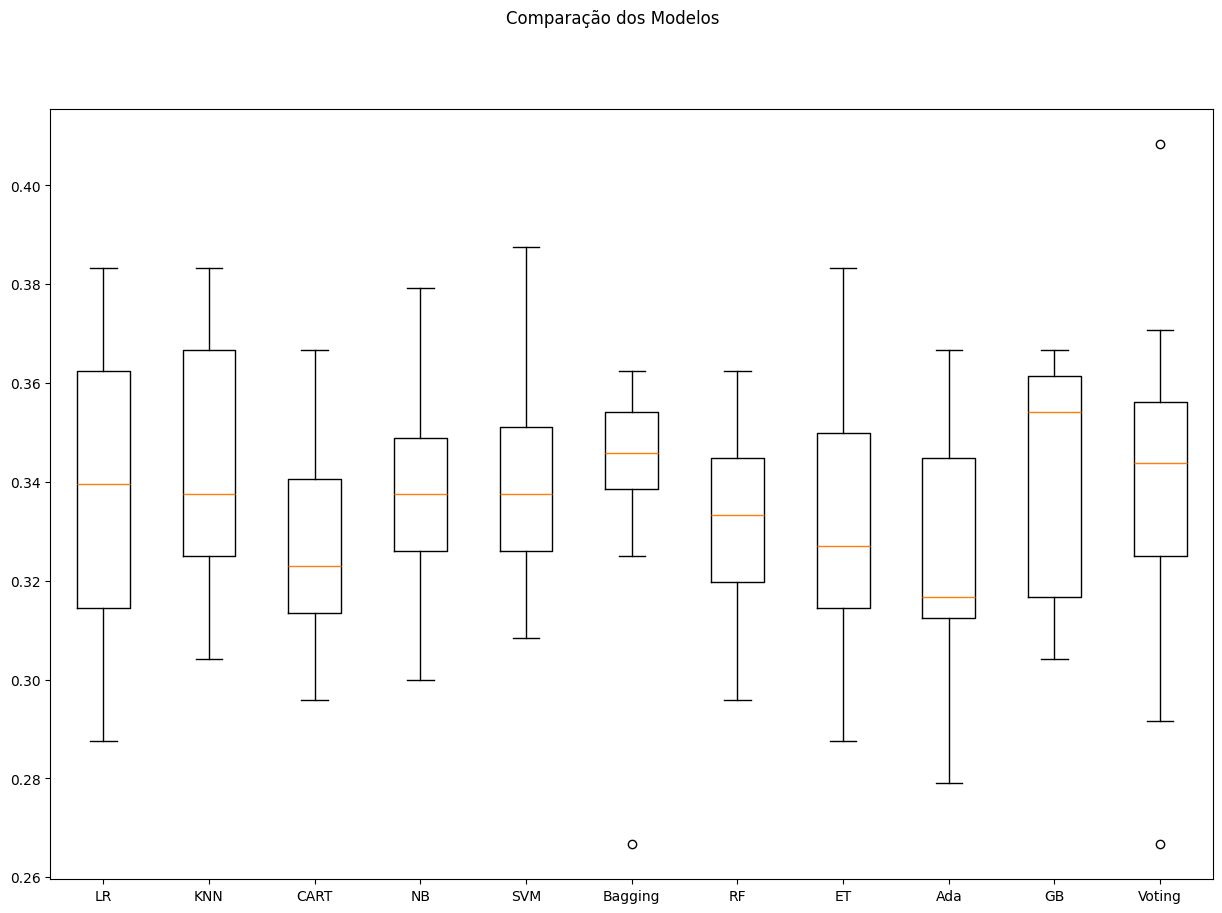

In [60]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### *5.2. Criação e avaliação de modelos: dados padronizados e normalizados*

LR-orig: 0.339 (0.030)
KNN-orig: 0.343 (0.027)
CART-orig: 0.328 (0.023)
NB-orig: 0.338 (0.020)
SVM-orig: 0.340 (0.025)
Bag-orig: 0.340 (0.027)
RF-orig: 0.333 (0.018)
ET-orig: 0.332 (0.027)
Ada-orig: 0.324 (0.026)
GB-orig: 0.341 (0.023)
Vot-orig: 0.338 (0.038)
LR-padr: 0.337 (0.029)
KNN-padr: 0.315 (0.032)
CART-padr: 0.335 (0.037)
NB-padr: 0.338 (0.020)
SVM-padr: 0.325 (0.025)
Bag-padr: 0.350 (0.017)
RF-padr: 0.325 (0.018)
ET-padr: 0.314 (0.028)
Ada-padr: 0.324 (0.026)
GB-padr: 0.342 (0.021)
Vot-padr: 0.342 (0.030)
LR-norm: 0.336 (0.026)
KNN-norm: 0.328 (0.021)
CART-norm: 0.340 (0.026)
NB-norm: 0.338 (0.020)
SVM-norm: 0.328 (0.028)
Bag-norm: 0.340 (0.030)
RF-norm: 0.333 (0.019)
ET-norm: 0.322 (0.028)
Ada-norm: 0.324 (0.026)
GB-norm: 0.342 (0.021)
Vot-norm: 0.337 (0.042)


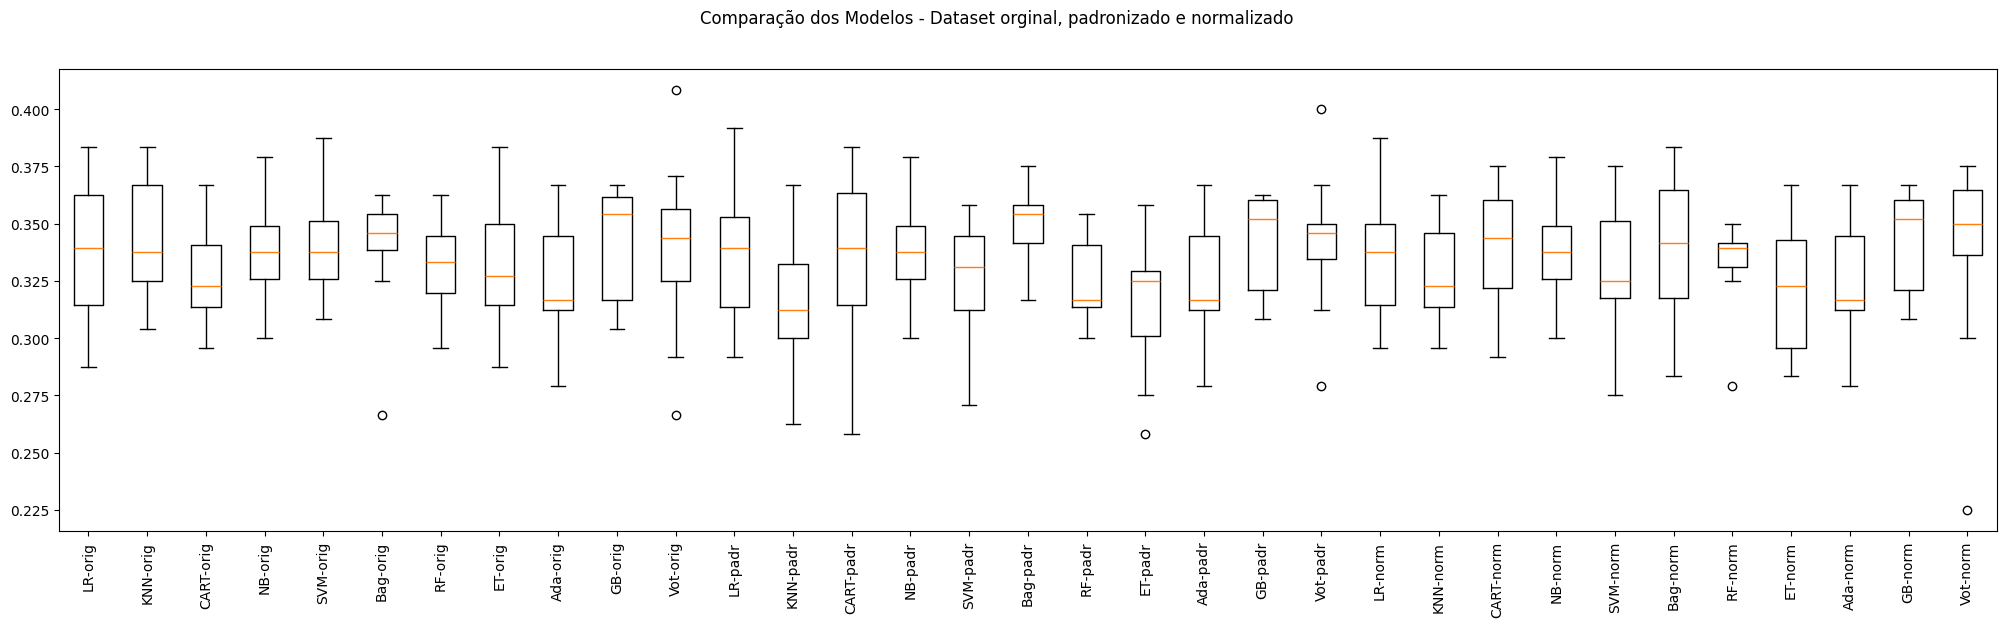

In [61]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### *5.3. Otimização dos hiperparâmetros*

In [62]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

knn-orig - Melhor: 0.365000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
knn-padr - Melhor: 0.335833 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
knn-norm - Melhor: 0.341667 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 7}


### *5.4. Finalização do Modelo*

In [68]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
model = KNeighborsClassifier(n_neighbors=1,metric='manhattan')
model.fit(X_train,y_train)

# Estimativa da acurácia no conjunto de teste
predictions = X_test
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.37166666666666665
